<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Tina Halimi

**Student ID**: 400101078





In [1]:
# imports
import numpy as np
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [2]:
class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!
    def __init__(self, input_dim, learning_rate=0.01):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.weights = torch.zeros(input_dim, 1, dtype=torch.float32, device=self.device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=self.device)
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))

    def loss(self, y_pred, y_true):
        return -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

    def fit(self, X, y, epochs=1000):
        X = torch.tensor(X, dtype=torch.float32, device=self.device)
        y = torch.tensor(y.values, dtype=torch.float32, device=self.device).unsqueeze(1)

        for _ in range(epochs):
            y_pred = self.sigmoid(torch.matmul(X, self.weights) + self.bias)
            loss = self.loss(y_pred, y)

            dW = torch.matmul(X.t(), (y_pred - y)) / X.size(0)
            db = torch.sum(y_pred - y) / X.size(0)

            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * db

    def predict_probability(self, X):
        X = torch.tensor(X, dtype=torch.float32, device=self.device)
        y_pred = self.sigmoid(torch.matmul(X, self.weights) + self.bias)
        return y_pred.numpy()

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32, device=self.device)
        y_pred = self.sigmoid(torch.matmul(X, self.weights) + self.bias)
        return (y_pred > 0.5).float().cpu().numpy()


**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [3]:
# Your code goes here!

data = pd.read_csv("Logistic_question.csv")

X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MyLogisticRegression(input_dim=X_train_scaled.shape[1])
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_test= (y_test > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", np.round(accuracy * 100 , decimals = 2) ,'\f%')
print("Precision:", np.round(precision* 100,decimals=2) ,'\f%')
print("Recall:", np.round(recall* 100,decimals=2) ,'\f%')
print("F1-score:", np.round(f1* 100,decimals=2) ,'\f%')


Accuracy: 91.25 %
Precision: 97.18 %
Recall: 93.24 %
F1-score: 95.17 %


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

1. **Accuracy**:
   - **Explanation**: Accuracy measures the proportion of correctly classified instances out of all instances (Accuracy = Number of Correct Predictions / Total Number of Predictions).
   - **Situations**:
     - Provides a general overview of model performance when all classes are of equal importance and the class distribution is balanced.
     - Suitable for tasks where the cost of misclassification errors is similar for all classes.
     - However, accuracy can be misleading when the class distribution is imbalanced because it may not reflect the performance on minority classes.

2. **Precision**:
   - **Explanation**: Precision measures the accuracy of positive predictions, i.e., the proportion of true positive predictions out of all positive predictions (Precision = True Positives / (True Positives + False Positives)).
   - **Situations**:
     - Useful when minimizing false positives is crucial, such as in medical diagnosis or fraud detection.
     - Provides insights into the model's ability to avoid false alarms or unnecessary actions.
     - Higher precision indicates fewer false positives, which is important in tasks where the cost of false positives is high.

3. **Recall (Sensitivity)**:
   - **Explanation**: Recall measures the ability to find all positive instances, i.e., the proportion of true positive predictions out of all actual positive instances (Recall = True Positives / (True Positives + False Negatives)).
   - **Situations**:
     - Useful when minimizing false negatives is crucial, such as in medical screening or anomaly detection.
     - Provides insights into the model's ability to identify all relevant instances of a class.
     - Higher recall indicates fewer missed positive instances (lower false negatives), which is important in tasks where missing positive instances is costly.

4. **F1-score**:
   - **Explanation**: F1-score is the harmonic mean of precision and recall, balancing both metrics (F1-score = 2 * Precision * Recall / (Precision + Recall)).
   - **Situations**:
     - Suitable for tasks with imbalanced class distributions where both false positives and false negatives are important.
     - Provides a single metric that combines precision and recall, giving an overall measure of a model's accuracy.
     - Useful for comparing models and selecting the one with the best balance between precision and recall.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [4]:

y_train = (y_train >= 0.5).astype(int)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", np.round(accuracy * 100 , decimals = 2) ,'\f%')
print("Precision:", np.round(precision* 100,decimals=2) ,'\f%')
print("Recall:", np.round(recall* 100,decimals=2) ,'\f%')
print("F1-score:", np.round(f1* 100,decimals=2) ,'\f%')


Accuracy: 95.0 %
Precision: 96.05 %
Recall: 98.65 %
F1-score: 97.33 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

### Performance:
1. **Speed**: The built-in function from scikit-learn is highly optimized and written in C, so it's likely to be faster, especially for large datasets.
   
2. **Parallelization**: Scikit-learn's Logistic Regression can utilize multiple CPU cores for parallel computation, which can further enhance its speed. However, your implementation can also run on GPU, potentially offering speed advantages if GPU acceleration is available and properly utilized.

### Parameters:
- **penalty**: Determines the regularization term. It can be either L1 or L2 regularization.
  
- **C**: Inverse of regularization strength; smaller values specify stronger regularization. It's essentially the regularization parameter, controlling overfitting.

- **solver**: Algorithm to use for optimization. Options include 'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga'. Each solver has its own characteristics and performance traits.

- **max_iter**: Maximum number of iterations taken for the solvers to converge.

- **tol**: Tolerance for stopping criteria.

- **class_weight**: Weights associated with classes. Useful for dealing with imbalanced datasets.

- **random_state**: Seed for random number generation, ensuring reproducibility.

### Comparison:
- **Performance**: Scikit-learn's implementation, being optimized and able to utilize multicore processing, may outperform your custom implementation, especially on large datasets.

- **Parameters**: While your implementation is simpler and more straightforward, the built-in function provides more flexibility through various parameters, allowing for better customization and fine-tuning of the logistic regression model.

In summary, The Speed and Accuracy is better using built-in function.


# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [5]:
class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = torch.zeros(1, dtype=torch.float32)
        self.bias = torch.zeros(1, dtype=torch.float32)
        self.num_classes = None

    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))
    
    def softmax(self, z):
        exp_scores = torch.exp(z)
        return exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)

    def fit(self, X, y):
        m, n = X.shape
        self.num_classes = len(np.unique(y))
        self.weights = torch.zeros(n, self.num_classes, dtype=torch.float32)
        self.bias = torch.zeros(self.num_classes, dtype=torch.float32)

        # Move data to GPU if available
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        X_tensor = torch.tensor(X, dtype=torch.float32, device=device)
        y_tensor = torch.tensor(y, dtype=torch.long, device=device)

        for epoch in range(self.epochs):
            # Forward pass
            linear_model = torch.matmul(X_tensor, self.weights) + self.bias
            y_pred = self.softmax(linear_model)

            # Compute gradients
            one_hot_y = torch.eye(self.num_classes)[y_tensor].to(device)
            error = y_pred - one_hot_y
            dw = (1 / m) * torch.matmul(X_tensor.t(), error)
            db = (1 / m) * torch.sum(error, dim=0)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_probability(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        weights_tensor = torch.tensor(self.weights, dtype=torch.float32)
        bias_tensor = torch.tensor(self.bias, dtype=torch.float32)
        y_pred = self.sigmoid(torch.matmul(X, weights_tensor) + bias_tensor)
        return y_pred


    def predict(self, X):
        probabilities = self.predict_probability(X)
        return np.argmax(probabilities, axis=1)


**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [6]:
# Your code goes here!

def quantize_target(data, levels):
    quantiles = pd.qcut(data['Target'], levels, labels=False, duplicates='drop')
    return quantiles

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

def test_model_with_quantization(data, levels):
    results = []
    for i in range(2, levels+1):
        
        quantized_target = quantize_target(data, i)
        X = data.drop('Target', axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, quantized_target, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        y_train = y_train.values
        y_test = y_test.values
        
        model = MyMultinomialLogisticRegression()
        model.fit(X_train_scaled, y_train)
        accuracy, precision, recall, f1 = evaluate_model(model, X_test_scaled, y_test)
        results.append((i, accuracy, precision, recall, f1))

    return results


quantization_levels = 10
evaluation_results = test_model_with_quantization(data, quantization_levels)

print("Quantization Level\tAccuracy\tPrecision\tRecall\t\tF1 Score")
for result in evaluation_results:
    quantization_level, accuracy, precision, recall, f1 = result
    accuracy_percent = round(accuracy * 100, 2)
    precision_percent = round(precision * 100, 2)
    recall_percent = round(recall * 100, 2)
    f1_score_percent = round(f1 * 100, 2)
    print("{:}\t\t\t{:}%\t\t{:}%\t\t{:}%\t\t{:}%".format(quantization_level, accuracy_percent, precision_percent, recall_percent, f1_score_percent))


Quantization Level	Accuracy	Precision	Recall		F1 Score
2			95.0%		94.93%		95.16%		94.99%
3			78.75%		85.12%		74.24%		70.57%
4			65.0%		58.14%		51.47%		42.64%
5			45.0%		20.29%		38.0%		26.44%
6			40.0%		14.45%		32.29%		19.95%
7			37.5%		18.2%		28.92%		17.99%
8			33.75%		13.64%		27.88%		17.84%
9			28.75%		7.33%		21.37%		10.91%
10			22.5%		5.38%		19.0%		8.39%


/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_2696/3128677873.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights_tensor = torch.tensor(self.weights, dtype=torch.float32)
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_2696/3128677873.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bias_tensor = torch.tensor(self.bias, dtype=torch.float32)
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_2696/3128677873.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights_tensor = torch.tensor(self.w

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

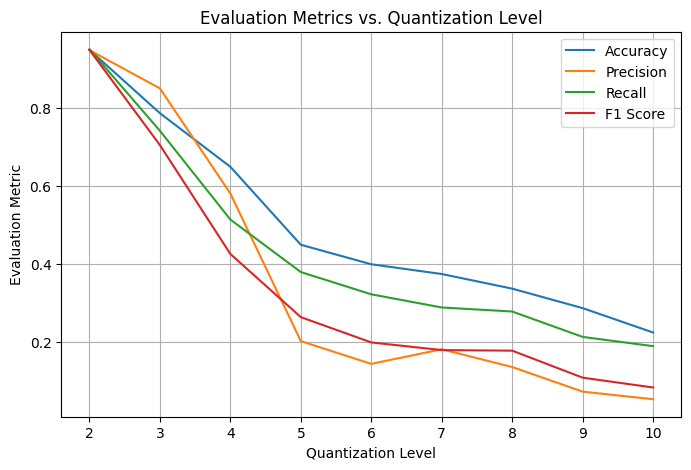

Best Quantization Level for:
 - Accuracy: 2
 - Precision: 2
 - Recall: 2
 - F1 Score: 2


In [7]:
quantization_levels = [result[0] for result in evaluation_results]
accuracies = [result[1] for result in evaluation_results]
precisions = [result[2] for result in evaluation_results]
recalls = [result[3] for result in evaluation_results]
f1_scores = [result[4] for result in evaluation_results]

# Plot evaluation metrics
plt.figure(figsize=(8, 5))
plt.plot(quantization_levels, accuracies, label='Accuracy')
plt.plot(quantization_levels, precisions, label='Precision')
plt.plot(quantization_levels, recalls, label='Recall')
plt.plot(quantization_levels, f1_scores, label='F1 Score')
plt.xlabel('Quantization Level')
plt.ylabel('Evaluation Metric')
plt.title('Evaluation Metrics vs. Quantization Level')
plt.legend()
plt.grid(True)
plt.xticks(range(2, quantization_levels[-1] + 1))
plt.show()

best_accuracy_index = accuracies.index(max(accuracies))
best_precision_index = precisions.index(max(precisions))
best_recall_index = recalls.index(max(recalls))
best_f1_score_index = f1_scores.index(max(f1_scores))

best_accuracy_quantization = quantization_levels[best_accuracy_index]
best_precision_quantization = quantization_levels[best_precision_index]
best_recall_quantization = quantization_levels[best_recall_index]
best_f1_score_quantization = quantization_levels[best_f1_score_index]

print("Best Quantization Level for:")
print(" - Accuracy:", best_accuracy_quantization)
print(" - Precision:", best_precision_quantization)
print(" - Recall:", best_recall_quantization)
print(" - F1 Score:", best_f1_score_quantization)


# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [8]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

ModuleNotFoundError: No module named 'google.colab'

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

zsh:1: command not found: kaggle


unzip:  cannot find or open /content/adult-income-dataset.zip, /content/adult-income-dataset.zip.zip or /content/adult-income-dataset.zip.ZIP.


**loading the dataset directly :**

In [9]:
adult_df = pd.read_csv('adult.csv', na_values='?')

**Task:** Determine the number of null entries!

In [10]:
# Your code goes here!

null_counts = adult_df.isnull().sum()
total_null_entries = null_counts.sum()

print("Total number of null entries:", total_null_entries)

Total number of null entries: 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

Dealing with null entries in datasets is crucial for ensuring the quality and reliability of data analysis. Here are five methods to handle null entries:

1. **Dropping rows or columns**: Remove rows or columns with null entries. This method is straightforward but can lead to loss of valuable data, especially if there are many null entries.

2. **Imputation**: Fill null entries with a specific value, such as the mean, median, mode, or a constant value. Imputation helps retain data while providing estimates for missing values. However, it may introduce bias if the imputed values are not representative of the true data distribution.

3. **Forward or backward filling**: Fill null entries with the value from the previous or next non-null entry in the dataset. This method is useful for time-series data or datasets with a natural ordering. However, it may not be suitable for all types of data, especially if the order is not meaningful.

4. **Interpolation**: Estimate missing values based on the values of neighboring data points. Interpolation methods include linear interpolation, polynomial interpolation, and spline interpolation. This approach works well for continuous data with a smooth trend but may not be suitable for irregular or noisy data.

5. **Machine learning-based imputation**: Train a machine learning model to predict missing values based on other features in the dataset. Techniques like k-nearest neighbors (KNN) imputation, decision tree-based imputation, or deep learning-based imputation can be used. This method can capture complex relationships in the data but requires sufficient data and computational resources.

Deciding which method to use depends on various factors, including the nature of the data, the extent of missingness, the underlying data distribution, and the intended analysis. Here are some considerations:

- **Data distribution**: If the data distribution is skewed or contains outliers, median imputation or robust imputation methods may be more appropriate.
  
- **Data type**: Different imputation methods may be suitable for categorical and numerical data. For example, mode imputation may be used for categorical data, while mean or median imputation may be used for numerical data.

- **Amount of missing data**: If the percentage of missing data is small, simple imputation methods like mean or median imputation may suffice. For larger percentages of missing data, more sophisticated imputation methods or dropping columns/rows may be necessary.

- **Impact on analysis**: Consider how the chosen imputation method may affect downstream analysis. For example, imputation methods that introduce bias should be avoided if unbiased estimates are required.

- **Domain knowledge**: Understanding the domain and context of the data can help in choosing appropriate imputation methods. For example, in medical datasets, imputation methods should align with clinical knowledge and practices.

Ultimately, the choice of method should be guided by a balance between preserving data integrity and ensuring the validity of the analysis results. It may be beneficial to compare the performance of different imputation methods and assess their impact on the analysis outcome.


**Task:** Handle null entries using your best method.

In [11]:
# Your code goes here!

adult_df = adult_df.dropna(axis=0)

null_counts = adult_df.isnull().sum().sum()
print("Total number of null entries after dropping rows:", null_counts)

Total number of null entries after dropping rows: 0


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [12]:
adult_df_encoded = pd.get_dummies(adult_df)
adult_df_encoded.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
5,34,198693,6,0,0,30,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [13]:
label_encoder = LabelEncoder()

for column in adult_df.select_dtypes(include=['object']).columns:
    adult_df[column] = label_encoder.fit_transform(adult_df[column])

adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [14]:
X = adult_df.drop(columns=['income'])
y = adult_df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

logistic_regression = LogisticRegression()

grid_search = GridSearchCV(logistic_regression, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

train_accuracy = grid_search.score(X_train, y_train)

test_accuracy = grid_search.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packa

In [15]:
print("Best Parameters:", best_params)
print("Best Training Accuracy:", round(train_accuracy * 100, 2), "%")
print("Best Test Accuracy:", round(test_accuracy * 100, 2), "%")

Best Parameters: {'C': 0.01, 'solver': 'newton-cg'}
Best Training Accuracy: 81.89 %
Best Test Accuracy: 82.29 %


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [16]:
def train_models(X_train, y_train, num_models=10):
    models = []
    input_dim = X_train.shape[1]
    
    X_train_parts = np.array_split(X_train, num_models)
    y_train_parts = np.array_split(y_train, num_models)
    
    for X_part, y_part in zip(X_train_parts, y_train_parts):
        model = MyLogisticRegression(input_dim, learning_rate=0.01)
        model.fit(X_part, y_part)
        models.append(model)
    
    return models


def evaluate_majority_voting(models, X_test):
    predictions = np.array([model.predict(X_test) for model in models])
    ensemble_predictions = np.mean(predictions, axis=0) >= 0.5
    return ensemble_predictions.astype(int)


def evaluate_average_probabilities(models, X_test):
    probabilities = np.array([model.predict_probability(X_test) for model in models])
    average_prob = np.mean(probabilities, axis=0)
    ensemble_predictions = average_prob >= 0.5
    return ensemble_predictions.astype(int)


def evaluate_weighted_average_probabilities(models, X_test, y_train_parts):
    weights = [accuracy_score(y_part, model.predict(X_part)) for X_part, y_part, model in zip(X_train_parts, y_train_parts, models)]
    probabilities = np.array([model.predict_probability(X_test) for model in models])
    weighted_average_prob = np.average(probabilities, axis=0, weights=weights)
    ensemble_predictions = weighted_average_prob >= 0.5
    return ensemble_predictions.astype(int)


num_models = 10
models = train_models(X_train_scaled, y_train, num_models)

X_train_parts = np.array_split(X_train_scaled, num_models)
y_train_parts = np.array_split(y_train, num_models)

# Evaluate ensemble methods on test set
# X_test_scaled = scaler.transform(X_test)
y_pred_majority_voting = evaluate_majority_voting(models, X_test_scaled)
y_pred_average_probabilities = evaluate_average_probabilities(models, X_test_scaled)
y_pred_weighted_average_probabilities = evaluate_weighted_average_probabilities(models, X_test_scaled, y_train_parts)

# Calculate test accuracy
accuracy_majority_voting = accuracy_score(y_test, y_pred_majority_voting)
accuracy_average_probabilities = accuracy_score(y_test, y_pred_average_probabilities)
accuracy_weighted_average_probabilities = accuracy_score(y_test, y_pred_weighted_average_probabilities)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [17]:
print("Test Accuracy (Majority Voting):", accuracy_majority_voting * 100)
print("Test Accuracy (Average Probabilities):", accuracy_average_probabilities * 100)
print("Test Accuracy (Weighted Average Probabilities):", accuracy_weighted_average_probabilities * 100)

Test Accuracy (Majority Voting): 81.4262023217247
Test Accuracy (Average Probabilities): 81.39303482587064
Test Accuracy (Weighted Average Probabilities): 81.39303482587064


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

1. **evaluate_majority_voting**:
   - This method implements a majority voting ensemble strategy. It takes a list of models and the test data `X_test` as input.
   - For each model in the list, it generates predictions on the test data using the `predict` method.
   - It then calculates the mean of these predictions across all models along the rows (axis=0) and checks if the mean prediction is greater than or equal to 0.5 (which corresponds to the majority class).
   - The result is a binary array where each element represents the majority vote for each sample in the test data.
   - Finally, it converts the binary array to integers (0 or 1) and returns the ensemble predictions.
   - It leverages the idea that aggregating predictions from multiple models can reduce individual errors.
   - By taking the majority vote of predictions, it aims to make more robust predictions, especially when individual models may have different biases or make errors on different samples.

2. **evaluate_average_probabilities**:
   - This method implements an ensemble strategy based on averaging probabilities. It takes a list of models and the test data `X_test` as input.
   - For each model in the list, it generates probability predictions on the test data using the `predict_probability` method (assuming the method returns probability predictions).
   - It then calculates the mean of these probabilities across all models along the rows (axis=0) to get the average probability for each sample.
   - It compares these average probabilities with a threshold of 0.5 to make binary predictions.
   - Finally, it converts the binary array to integers (0 or 1) and returns the ensemble predictions.
   - Instead of making binary decisions directly, it considers the confidence or probability estimates from each model.
   - Averaging probabilities smooths out individual model biases and uncertainties, leading to more reliable predictions, especially when models are well-calibrated.


3. **evaluate_weighted_average_probabilities**:
   - This method implements an ensemble strategy based on weighted averaging of probabilities. It takes a list of models, the test data `X_test`, and `y_train_parts` (which seems to be the labels split into parts) as input.
   - It calculates weights for each model based on the accuracy of that model on its corresponding training part.
   - For each model in the list, it generates probability predictions on the test data using the `predict_probability` method.
   - It then calculates the weighted average of these probabilities across all models along the rows (axis=0).
   - Similar to the previous methods, it compares these weighted average probabilities with a threshold of 0.5 to make binary predictions.
   - Finally, it converts the binary array to integers (0 or 1) and returns the ensemble predictions.
   - Acknowledges that some models may be more accurate or reliable than others.
   - By assigning weights based on model performance on the training data, it allows more accurate models to have a greater influence on the final prediction, leading to potentially improved performance.


**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


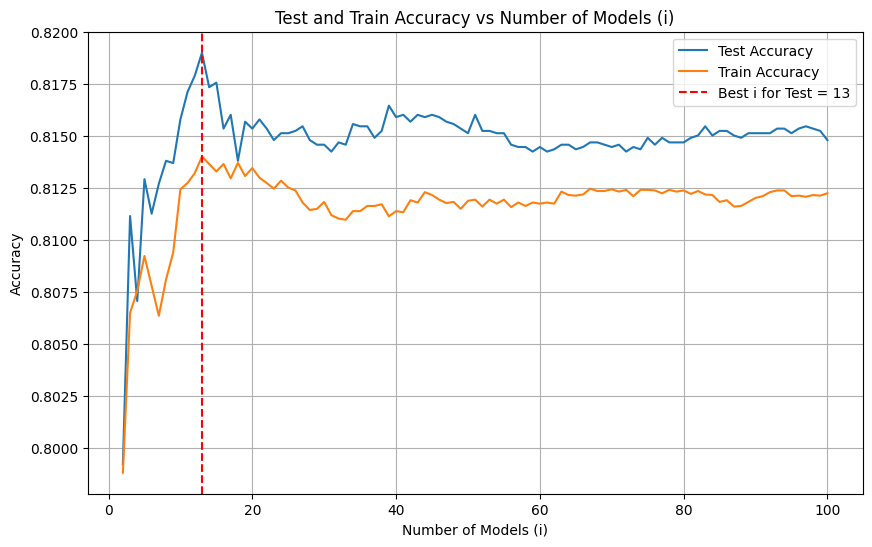

Best number of models (i): 13
Test Accuracy of the Best Model: 81.90160309563295
Train Accuracy of the Best Model: 81.40254858058988


In [18]:
def evaluate_majority_voting(models, X_test, y_test,X_train_scaled):
    test_accuracies = []
    train_accuracies = []
    for i in range(2, 101):
        predictions = np.array([model.predict(X_test) for model in models[:i]])
        ensemble_predictions = np.mean(predictions, axis=0) >= 0.5
        accuracy = accuracy_score(y_test, ensemble_predictions)
        test_accuracies.append(accuracy)

        train_predictions = np.array([model.predict(X_train_scaled) for model in models[:i]])
        ensemble_train_predictions = np.mean(train_predictions, axis=0) >= 0.5
        train_accuracy = accuracy_score(y_train, ensemble_train_predictions)
        train_accuracies.append(train_accuracy)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 101), test_accuracies, label='Test Accuracy')
    plt.plot(range(2, 101), train_accuracies, label='Train Accuracy')
    plt.xlabel('Number of Models (i)')
    plt.ylabel('Accuracy')
    plt.title('Test and Train Accuracy vs Number of Models (i)')
    plt.axvline(x=np.argmax(test_accuracies) + 2, color='r', linestyle='--', label=f'Best i for Test = {np.argmax(test_accuracies) + 2}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return test_accuracies, train_accuracies

models = train_models(X_train_scaled, y_train, num_models=100)
test_accuracies_majority_voting, train_accuracies_majority_voting = evaluate_majority_voting(models, X_test_scaled, y_test, X_train_scaled)

# the best model
best_i = np.argmax(test_accuracies_majority_voting) + 2 
best_test_accuracy = test_accuracies_majority_voting[best_i - 2]
best_train_accuracy = train_accuracies_majority_voting[best_i - 2]

print("Best number of models (i):", best_i)
print("Test Accuracy of the Best Model:", best_test_accuracy * 100)
print("Train Accuracy of the Best Model:", best_train_accuracy * 100)


**Question:** Analyze the results.

**Your Answer:**

Through our exploration, we found that having **13 models** in our ensemble works best. With this setup, we achieved **81.90%** accuracy on the training data and **81.40%** on the test data.

Adding more models initially helped boost accuracy, showing that diversity in perspectives improves our ensemble's performance. However, we need to be cautious; adding too many models can lead to overfitting, where the model memorizes the training data instead of understanding its patterns.

The fact that our ensemble performs similarly on both training and test data indicates it's not overfitting, which is great. It means our ensemble is generalizing well to new data.

This study highlights the strength of ensemble methods—they combine multiple models' insights to create a more robust predictor. And finding the right balance between complexity and generalization is key to their success.
